### Problem Statement: 
#### A digital markeing agency ran an ad-campaign on facebook. As per their data collected, we need to predict the conversion for future campaigns based on multiple parameters used.

In [1]:
# 1. import libraries
# 2. import data
# 3. EDA - 
# a. Univariate Analysis
#    a.i) Checking Missing Values
#    a.ii) Remove outliers
# b. Bivariate Analysis - Check relationship between the independent variable & dependent variable
#    b.i) Correlation Co-efficient Between variables
#    b.ii) Heatmap (10x10 Matrix)

# 4. Data Partition
# 5. Model Building
# a. Multicolinearity - with VIF
# b. Removing the insignificant variable
# c. Backward Elimination Method
# d. VIF of Model

# 6. Assumption of Model
# a) Homoscedasicity
# b) Normality
# c) Model Error IID
# 7. Prediction on Test Data
# 8. MSE & MAE & RMSE for evaluation of Model on test data
# 9. MSE & MAE & RMSE for evaluation of Model on train data

# Importing Libraries & Data

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression   # all models to come under sklearn package - only modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
%matplotlib inline
import os 

In [2]:
os.chdir(r'C:\Users\RONALD\Desktop\Python Code\Practise\Projects\MLR')
campaign_data = pd.read_csv('fb-campaign-data1.csv')

In [3]:
campaign_data.head()

,impressions,clicks,spent,CTR,Avg CPC,App Install,total_conversion
0,7350,2,1.43,0.000272,0.715,0,2
1,17861,2,1.82,0.000112,0.910,0,2
2,693,0,0.00,0.000000,0.000,0,0
3,4259,1,1.25,0.000235,1.250,0,1
4,4133,1,1.29,0.000242,1.290,0,1


In [5]:
#campaign_data = campaign_data.drop('Unnamed: 7', axis = 1)
#campaign_data.head()

In [4]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 7 columns):
impressions         1143 non-null int64
clicks              1143 non-null int64
spent               1143 non-null float64
CTR                 1143 non-null float64
Avg CPC             1143 non-null float64
App Install         1143 non-null int64
total_conversion    1143 non-null int64
dtypes: float64(3), int64(4)
memory usage: 62.6 KB


In [5]:
campaign_data.describe()

,impressions,clicks,spent,CTR,Avg CPC,App Install,total_conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,1.867321e+05,33.391076,51.360656,0.000164,1.227192,6.759405,2.670166
std,3.127622e+05,56.891947,86.908418,0.000115,0.615051,13.007637,4.574797
min,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.503500e+03,1.000000,1.480000,0.000101,1.232000,0.000000,1.000000
50%,5.150900e+04,8.000000,12.370000,0.000160,1.450000,0.000000,1.000000
75%,2.217690e+05,37.500000,60.025000,0.000234,1.600000,10.000000,3.000000
max,3.052003e+06,421.000000,639.949998,0.001059,2.212000,80.000000,60.000000


# EDA

## A. Univariate Analysis

### Checking missing values

In [6]:
# ---- to check null values in the dataset
campaign_data.isnull().sum(axis=0)    #axis=0 for rows, axis=1 for columns

impressions         0
clicks              0
spent               0
CTR                 0
Avg CPC             0
App Install         0
total_conversion    0
dtype: int64

C:\Users\RONALD\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


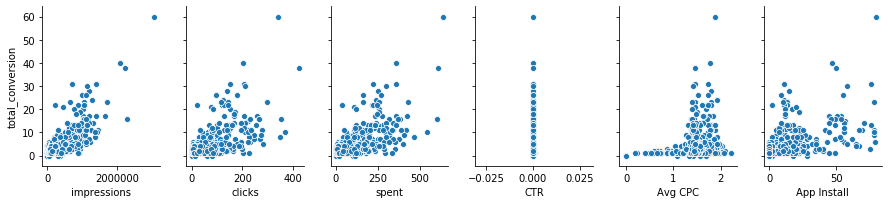

In [7]:
# Data Visualization - (* Check outliers also)

sns.pairplot(campaign_data, x_vars=['impressions','clicks','spent','CTR', 'Avg CPC', 'App Install'], y_vars='total_conversion', size=3, aspect=0.7, kind='scatter')

## Checking & Treating/Removing Outliers

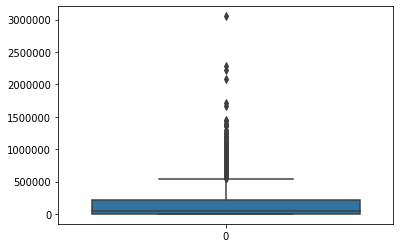

In [8]:
sns.boxplot(data=campaign_data['impressions'])

In [9]:
### ------- Winsorizing technique for variable Impressions---------------

q1 = campaign_data['impressions'].quantile(0.25)
q3 = campaign_data['impressions'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-316394.75, 544667.25)

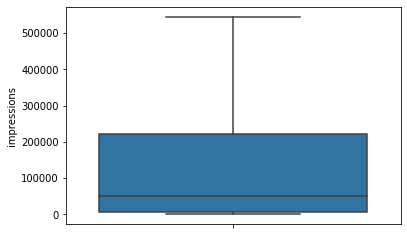

In [10]:
campaign_data['impressions'] = np.where(campaign_data['impressions'] > high,high,campaign_data['impressions'])  #upper limit

campaign_data['impressions'] = np.where(campaign_data['impressions'] < low,low,campaign_data['impressions'])  #lower limit

sns.boxplot(y=campaign_data['impressions'])    # for horizontal use x instead of y

In [11]:
campaign_data['impressions'].describe()

count      1143.000000
mean     144418.444226
std      184174.591624
min          87.000000
25%        6503.500000
50%       51509.000000
75%      221769.000000
max      544667.250000
Name: impressions, dtype: float64

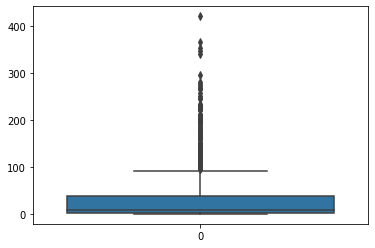

In [12]:
sns.boxplot(data=campaign_data['clicks'])

In [13]:
### ------- Winsorizing technique for variable clicks---------------

q1 = campaign_data['clicks'].quantile(0.25)
q3 = campaign_data['clicks'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-53.75, 92.25)

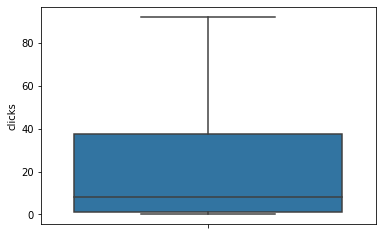

In [14]:
campaign_data['clicks'] = np.where(campaign_data['clicks'] > high,high,campaign_data['clicks'])  #upper limit

campaign_data['clicks'] = np.where(campaign_data['clicks'] < low,low,campaign_data['clicks'])  #lower limit

sns.boxplot(y=campaign_data['clicks'])    # for horizontal use x instead of y

In [15]:
campaign_data['clicks'].describe()

count    1143.000000
mean       24.664698
std        31.630431
min         0.000000
25%         1.000000
50%         8.000000
75%        37.500000
max        92.250000
Name: clicks, dtype: float64

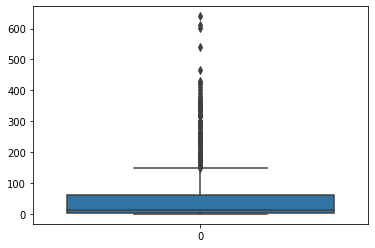

In [16]:
sns.boxplot(data=campaign_data['spent'])

In [17]:
### ------- Winsorizing technique for variable spent---------------

q1 = campaign_data['spent'].quantile(0.25)
q3 = campaign_data['spent'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-86.337499825, 147.842499759)

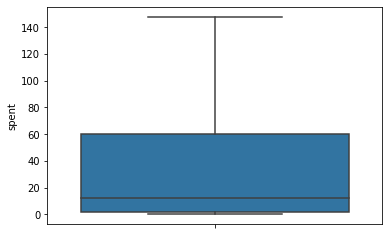

In [18]:
campaign_data['spent'] = np.where(campaign_data['spent'] > high,high,campaign_data['spent'])  #upper limit

campaign_data['spent'] = np.where(campaign_data['spent'] < low,low,campaign_data['spent'])  #lower limit

cx = sns.boxplot(y=campaign_data['spent'])    # for horizontal use x instead of y

In [19]:
campaign_data['spent'].describe()

count    1143.000000
mean       38.889503
std        50.502589
min         0.000000
25%         1.480000
50%        12.370000
75%        60.025000
max       147.842500
Name: spent, dtype: float64

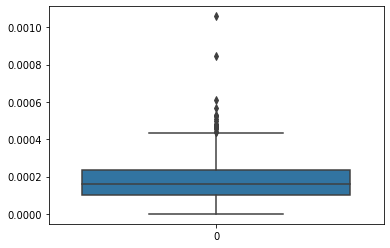

In [20]:
sns.boxplot(data=campaign_data['CTR'])

In [21]:
### ------- Winsorizing technique for variable CTR---------------

q1 = campaign_data['CTR'].quantile(0.25)
q3 = campaign_data['CTR'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-9.974999999999999e-05, 0.00043424999999999996)

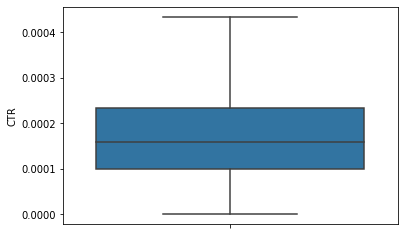

In [22]:
campaign_data['CTR'] = np.where(campaign_data['CTR'] > high,high,campaign_data['CTR'])  #upper limit

campaign_data['CTR'] = np.where(campaign_data['CTR'] < low,low,campaign_data['CTR'])  #lower limit

sns.boxplot(y=campaign_data['CTR'])    # for horizontal use x instead of y

In [23]:
campaign_data['CTR'].describe()

count    1143.000000
mean        0.000163
std         0.000108
min         0.000000
25%         0.000101
50%         0.000160
75%         0.000234
max         0.000434
Name: CTR, dtype: float64

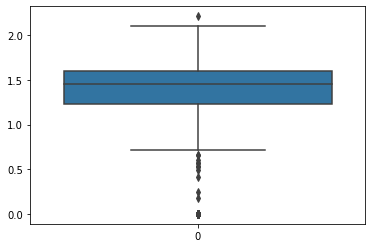

In [24]:
sns.boxplot(data=campaign_data['Avg CPC'])

In [25]:
### ------- Winsorizing technique for variable Avg CPC---------------

q1 = campaign_data['Avg CPC'].quantile(0.25)
q3 = campaign_data['Avg CPC'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(0.6799999999999998, 2.152)

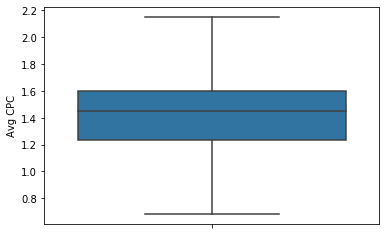

In [26]:
campaign_data['Avg CPC'] = np.where(campaign_data['Avg CPC'] > high,high,campaign_data['Avg CPC'])  #upper limit

campaign_data['Avg CPC'] = np.where(campaign_data['Avg CPC'] < low,low,campaign_data['Avg CPC'])  #lower limit

sns.boxplot(y=campaign_data['Avg CPC'])    # for horizontal use x instead of y

In [27]:
campaign_data['Avg CPC'].describe()

count    1143.000000
mean        1.352069
std         0.375998
min         0.680000
25%         1.232000
50%         1.450000
75%         1.600000
max         2.152000
Name: Avg CPC, dtype: float64

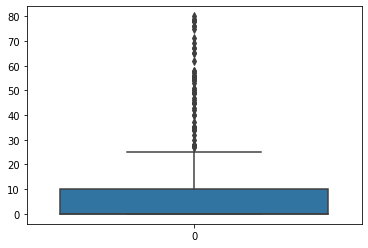

In [28]:
sns.boxplot(data=campaign_data['App Install'])

In [29]:
### ------- Winsorizing technique for variable App Install---------------

q1 = campaign_data['App Install'].quantile(0.25)
q3 = campaign_data['App Install'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-15.0, 25.0)

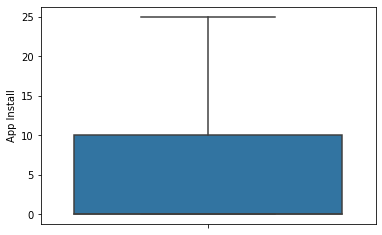

In [30]:
campaign_data['App Install'] = np.where(campaign_data['App Install'] > high,high,campaign_data['App Install'])  #upper limit

campaign_data['App Install'] = np.where(campaign_data['App Install'] < low,low,campaign_data['App Install'])  #lower limit

dx = sns.boxplot(y=campaign_data['App Install'])    # for horizontal use x instead of y

In [31]:
### ------- Winsorizing technique for variable total_conversion---------------

q1 = campaign_data['total_conversion'].quantile(0.25)
q3 = campaign_data['total_conversion'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-2.0, 6.0)

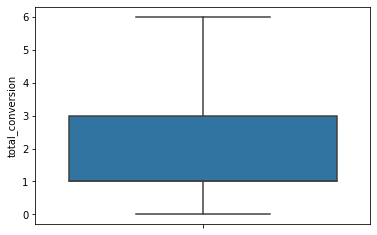

In [32]:
campaign_data['total_conversion'] = np.where(campaign_data['total_conversion'] > high,high,campaign_data['total_conversion'])  #upper limit

campaign_data['total_conversion'] = np.where(campaign_data['total_conversion'] < low,low,campaign_data['total_conversion'])  #lower limit

dx = sns.boxplot(y=campaign_data['total_conversion'])    # for horizontal use x instead of y

In [33]:
campaign_data['total_conversion'].describe()

count    1143.000000
mean        1.944882
std         1.880289
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         6.000000
Name: total_conversion, dtype: float64

### Outliers have been removed/treated. 

In [34]:
campaign_data.describe()

,impressions,clicks,spent,CTR,Avg CPC,App Install,total_conversion
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,144418.444226,24.664698,38.889503,0.000163,1.352069,5.314961,1.944882
std,184174.591624,31.630431,50.502589,0.000108,0.375998,7.873597,1.880289
min,87.000000,0.000000,0.000000,0.000000,0.680000,0.000000,0.000000
25%,6503.500000,1.000000,1.480000,0.000101,1.232000,0.000000,1.000000
50%,51509.000000,8.000000,12.370000,0.000160,1.450000,0.000000,1.000000
75%,221769.000000,37.500000,60.025000,0.000234,1.600000,10.000000,3.000000
max,544667.250000,92.250000,147.842500,0.000434,2.152000,25.000000,6.000000


C:\Users\RONALD\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


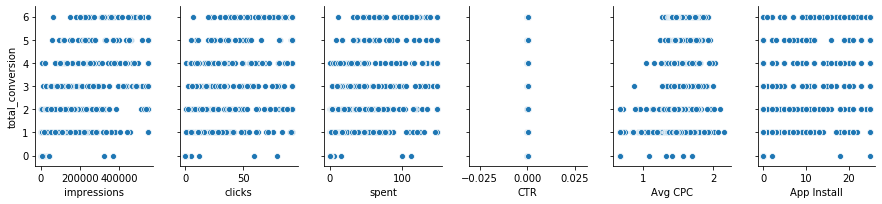

In [35]:
sns.pairplot(campaign_data, x_vars=['impressions','clicks','spent', 'CTR', 'Avg CPC', 'App Install'], y_vars='total_conversion', size=3, aspect=0.7, kind='scatter')

## B. Bivariate Analysis

In [36]:
# ------------ Step 4. Data Partition -------------

X = campaign_data.drop('total_conversion', axis=1)
Y = campaign_data[['total_conversion']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)


In [37]:
# --------------- Correlation Matrix ----------------

campaign_data_new = pd.concat([y_train, X_train], axis=1)

In [38]:
corr = campaign_data_new.corr()
display(corr)

,total_conversion,impressions,clicks,spent,CTR,Avg CPC,App Install
total_conversion,1.000000,0.811053,0.758333,0.766659,0.194294,0.511898,0.686829
impressions,0.811053,1.000000,0.972800,0.980066,0.131109,0.422616,0.840684
clicks,0.758333,0.972800,1.000000,0.996579,0.218670,0.390802,0.853652
spent,0.766659,0.980066,0.996579,1.000000,0.201960,0.407426,0.854006
CTR,0.194294,0.131109,0.218670,0.201960,1.000000,0.423096,0.191904
Avg CPC,0.511898,0.422616,0.390802,0.407426,0.423096,1.000000,0.350036
App Install,0.686829,0.840684,0.853652,0.854006,0.191904,0.350036,1.000000


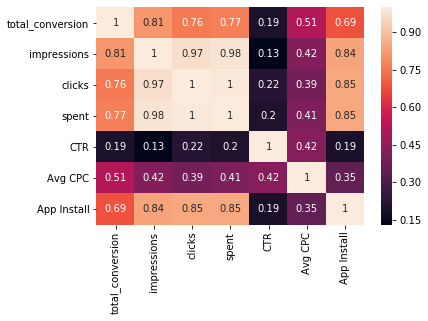

In [39]:
sns.heatmap(corr,annot = True)

In [40]:
X_train.head()

,impressions,clicks,spent,CTR,Avg CPC,App Install
578,297452.00,30.00,52.0200,0.000101,1.734,10.0
844,544667.25,92.25,147.8425,0.000194,1.501,21.0
50,11199.00,4.00,5.7300,0.000357,1.433,0.0
795,179950.00,35.00,58.6800,0.000194,1.677,0.0
653,220581.00,31.00,57.3700,0.000141,1.851,5.0


## 5. Model Building

In [41]:
# -------- Model Building --------

X_1 = sm.add_constant(X_train)

model = sm.OLS(y_train, X_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_conversion   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     338.8
Date:                Sat, 30 Nov 2019   Prob (F-statistic):          6.09e-215
Time:                        23:53:08   Log-Likelihood:                -1117.0
No. Observations:                 800   AIC:                             2248.
Df Residuals:                     793   BIC:                             2281.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4828      0.139     -3.476      

C:\Users\RONALD\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Multicolinearity (With the help of VIF)

In [42]:
campaign_data_new.columns

Index(['total_conversion', 'impressions', 'clicks', 'spent', 'CTR', 'Avg CPC',
       'App Install'],
      dtype='object')

In [43]:
X1 = campaign_data_new.drop(['total_conversion'], axis = 1)

# the VIF does expect a constant term in the data,
#so we need to add one sing the add_constant method
#X1 = sm.add_constant(campaign_data_new)

from statsmodels.stats.outliers_influence import variance_inflation_factor
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_before

impressions     51.164472
clicks         260.079988
spent          330.992116
CTR              5.174090
Avg CPC          5.907372
App Install      5.380694
dtype: float64

In [44]:
X_train = X_train.drop(['spent'],axis=1)

In [45]:
X_train.columns

Index(['impressions', 'clicks', 'CTR', 'Avg CPC', 'App Install'], dtype='object')

In [46]:

# define our input
X2 = sm.add_constant(X_train)

# create a OLS model
model2 = sm.OLS(y_train, X2).fit()
print(model2.summary())

#print()

                            OLS Regression Results                            
Dep. Variable:       total_conversion   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     396.0
Date:                Sat, 30 Nov 2019   Prob (F-statistic):          7.23e-213
Time:                        23:53:28   Log-Likelihood:                -1124.9
No. Observations:                 800   AIC:                             2262.
Df Residuals:                     794   BIC:                             2290.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.3726      0.137     -2.713      

In [47]:
campaign_data_new.columns

Index(['total_conversion', 'impressions', 'clicks', 'spent', 'CTR', 'Avg CPC',
       'App Install'],
      dtype='object')

In [48]:
X1.columns

Index(['impressions', 'clicks', 'spent', 'CTR', 'Avg CPC', 'App Install'], dtype='object')

In [49]:
#X1 = campaign_data_new.drop(['approved_conversion','spent'], axis = 1)

X1 = campaign_data_new.drop(['total_conversion','spent'], axis = 1)

# the VIF does expect a constant term in the data,
#so we need to add one sing the add_constant method
#X1 = sm.add_constant(campaign_data_new)

#from statsmodels.stats.outliers_influence import variance_inflation_factor
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_before

#print()

impressions    39.592062
clicks         40.608056
CTR             5.150205
Avg CPC         5.907191
App Install     5.372919
dtype: float64

In [50]:
#X_train = X_train.drop(['impressions'],axis=1)
X_train = X_train.drop(['clicks'],axis=1)

In [51]:
X_train.columns

Index(['impressions', 'CTR', 'Avg CPC', 'App Install'], dtype='object')

In [52]:

# define our input
X3 = sm.add_constant(X_train)

# create a OLS model
model3 = sm.OLS(y_train, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:       total_conversion   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     448.4
Date:                Sat, 30 Nov 2019   Prob (F-statistic):          4.33e-202
Time:                        23:54:42   Log-Likelihood:                -1153.1
No. Observations:                 800   AIC:                             2316.
Df Residuals:                     795   BIC:                             2340.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5125      0.141     -3.637      

In [53]:
campaign_data_new.columns

Index(['total_conversion', 'impressions', 'clicks', 'spent', 'CTR', 'Avg CPC',
       'App Install'],
      dtype='object')

In [54]:
#X1 = campaign_data_new.drop(['approved_conversion','spent','impressions'], axis = 1)
X1 = campaign_data_new.drop(['total_conversion','spent','clicks'], axis = 1)

# the VIF does expect a constant term in the data,
#so we need to add one sing the add_constant method
 #X1 = sm.add_constant(campaign_data_new)

from statsmodels.stats.outliers_influence import variance_inflation_factor
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_before


impressions    5.921249
CTR            4.101258
Avg CPC        5.105049
App Install    5.073455
dtype: float64

### 6. Assumptions of Model

In [55]:
# ------- 1. Homoscedasticity ---------

Data=pd.concat([X_train,y_train], axis=1)

In [56]:
Data['Fitted_value'] = model3.fittedvalues
Data['Residual'] = model3.resid

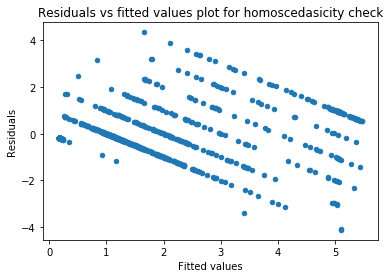

In [57]:
p = Data.plot.scatter(x='Fitted_value', y='Residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasicity check')
plt.show()

In [58]:
# Run the Breusch - Pagan test
from statsmodels.stats import diagnostic as diag 
_, pval2, __, f_pval2 = diag.het_breuschpagan(model3.resid, model3.model.exog)

print(pval2, f_pval2)

3.855768409499573e-19 2.866045461439971e-20


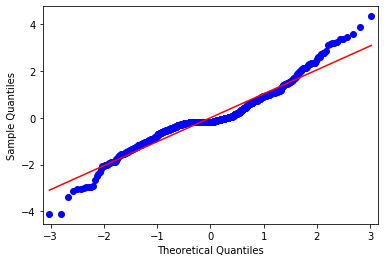

In [59]:
# --------- Normality ------------
import pylab
#check for the normality of the residuals
sm.qqplot(model3.resid, line='s')

# s indicate standardized line
pylab.show()

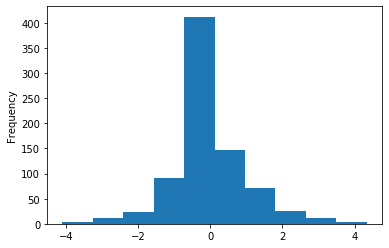

In [60]:
# ----------- Model Error ----------

Data['Residual'].plot.hist()

## Prediction on Test Data

In [61]:
X_test.columns

Index(['impressions', 'clicks', 'spent', 'CTR', 'Avg CPC', 'App Install'], dtype='object')

In [63]:
X_test2 = X_test[['impressions', 'CTR', 'Avg CPC', 'App Install']]
X_test2 = sm.add_constant(X_test2)

In [64]:
X_test2.head()

,const,impressions,CTR,Avg CPC,App Install
314,1.0,2214.00,0.000000,0.680,0.0
698,1.0,38580.00,0.000130,1.704,0.0
846,1.0,103709.00,0.000145,1.638,10.0
1136,1.0,544667.25,0.000182,1.454,13.0
1097,1.0,544667.25,0.000110,1.391,12.0


In [65]:
y_predict=model3.predict(X_test2)

In [66]:
test=pd.concat([X_test, y_test], axis=1)

In [67]:
test['Predicted']=y_predict

In [68]:
test.head()

,impressions,clicks,spent,CTR,Avg CPC,App Install,total_conversion,Predicted
314,2214.00,0.00,0.000000,0.000000,0.680,0.0,0.0,0.181268
698,38580.00,5.00,8.520000,0.000130,1.704,0.0,1.0,1.497834
846,103709.00,15.00,24.570000,0.000145,1.638,10.0,3.0,1.954515
1136,544667.25,92.25,147.842500,0.000182,1.454,13.0,6.0,5.028275
1097,544667.25,86.00,119.640002,0.000110,1.391,12.0,6.0,4.945086


# Performance on Test Dataset

In [69]:
import math
# calculate the mean squared Error
model_mse = mean_squared_error(test['total_conversion'], test['Predicted'])

# calculate the mean absolute Error
model_mae = mean_absolute_error(test['total_conversion'], test['Predicted'])

# calculate the root mean squared Error
model_rmse = math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.08
MAE 0.706
RMSE 1.04


# Performance on Training Data Set

In [70]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(Data['total_conversion'], Data['Fitted_value'])

# calculate the mean absolute Error
model_mse = mean_squared_error(Data['total_conversion'], Data['Fitted_value'])

# calculate the root mean squared Error
model_rmse = math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.05
MAE 0.706
RMSE 1.02


In [71]:
model3.params

const           -0.512453
impressions      0.000007
CTR            226.672523
Avg CPC          0.996282
App Install      0.004103
dtype: float64

### Equation = 

Y = B0 + B1.X1 + B2.X2 + B3.X3 + B4.X4 +e

total_conversion = -0.512453 + 0.000007 x impressions + 226.672523 x CTR + 0.996282 x Avg CPC + 0.004103 x App Install